In [1]:
# import libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

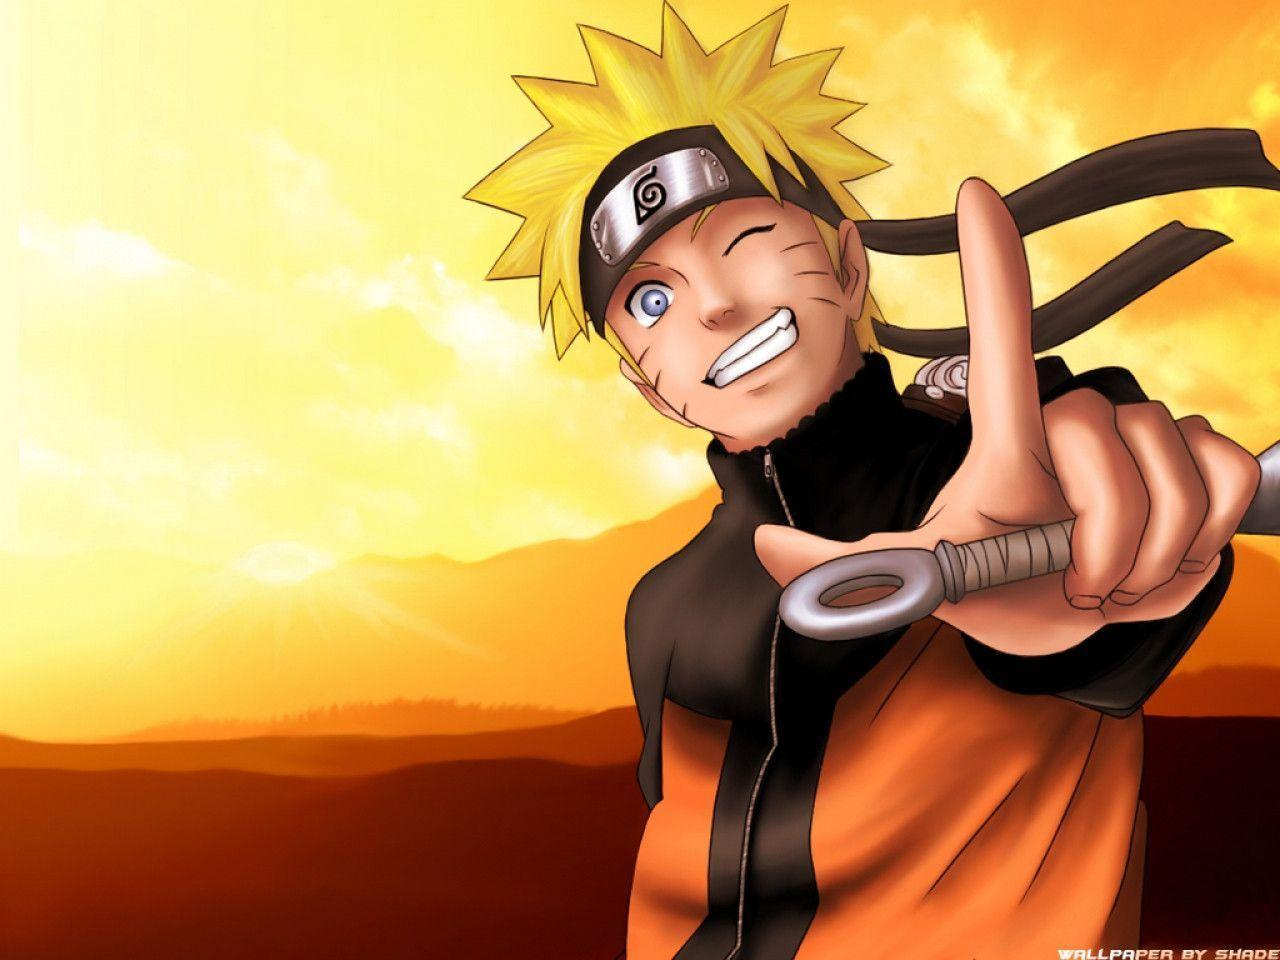

In [2]:
img = Image.open('naruto.png')
img

In [3]:
img_np = np.asanyarray(img)
img_np

array([[[255, 254, 213],
        [255, 254, 213],
        [255, 254, 213],
        ...,
        [255, 161,  48],
        [255, 161,  48],
        [255, 162,  49]],

       [[255, 254, 213],
        [255, 254, 213],
        [255, 254, 213],
        ...,
        [255, 160,  47],
        [255, 161,  48],
        [255, 161,  48]],

       [[255, 254, 213],
        [255, 254, 213],
        [255, 254, 213],
        ...,
        [255, 160,  47],
        [255, 160,  47],
        [255, 160,  47]],

       ...,

       [[107,  22,   1],
        [107,  22,   1],
        [107,  22,   1],
        ...,
        [181, 115,  89],
        [155,  83,  61],
        [125,  48,  28]],

       [[106,  24,   3],
        [106,  24,   3],
        [106,  24,   3],
        ...,
        [199, 132, 106],
        [134,  57,  37],
        [114,  36,  16]],

       [[106,  24,   3],
        [106,  24,   3],
        [106,  24,   3],
        ...,
        [109,  39,  14],
        [ 88,  11,   0],
        [120,  39,  20]]

In [4]:
img_np[0:2]

array([[[255, 254, 213],
        [255, 254, 213],
        [255, 254, 213],
        ...,
        [255, 161,  48],
        [255, 161,  48],
        [255, 162,  49]],

       [[255, 254, 213],
        [255, 254, 213],
        [255, 254, 213],
        ...,
        [255, 160,  47],
        [255, 161,  48],
        [255, 161,  48]]], dtype=uint8)

In [5]:
img_np.shape

(960, 1280, 3)

In [6]:
pixels = img_np.reshape(img_np.shape[0]*img_np.shape[1], img_np.shape[2])

In [7]:
pixels.shape

(1228800, 3)

In [8]:
from sklearn.cluster import KMeans

In [9]:
import warnings
warnings.filterwarnings('ignore')

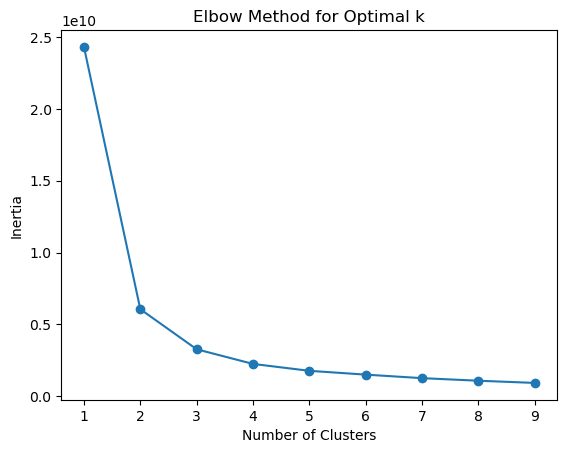

In [10]:
# Elbow method to find k
inertias = []
clusters_range = range(1, 10)

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pixels)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(clusters_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


from sklearn.metrics import silhouette_score
clusters_range = range(3,10)
silhouette_scores = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(pixels)
    silhouette_scores.append(silhouette_score(pixels, labels))

* Plot silhouette scores
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


In [11]:
model = KMeans(n_clusters=10)

In [12]:
model.fit(pixels)

KMeans(n_clusters=10)

In [13]:
pixels_centroids = model.labels_
pixels_centroids

array([3, 3, 3, ..., 7, 7, 7])

In [14]:
pixels_centroids.shape

(1228800,)

In [15]:
np.unique(pixels_centroids)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
cluster_centers = model.cluster_centers_

In [17]:
cluster_centers

array([[ 73.71383285,  49.0497362 ,  38.90859996],
       [253.56359079, 239.91501679, 134.14178215],
       [238.10040762, 119.81479589,  43.40119243],
       [253.71536843, 248.63055919, 185.21401721],
       [163.41955294,  60.55367   ,  14.11454515],
       [248.46030715, 194.30235565,  65.99759537],
       [ 19.82582252,   5.80022588,   4.46505342],
       [101.38132928,  22.70210153,   3.70620836],
       [236.767864  , 177.12192396, 147.75938871],
       [175.91636932, 108.50572086,  82.84235204]])

In [18]:
final = np.zeros((pixels_centroids.shape[0],3))

In [19]:
final.shape

(1228800, 3)

In [20]:
final[:10]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [21]:
for center_no in range(0,10):
    final[pixels_centroids==center_no] = cluster_centers[center_no]

In [22]:
final

array([[253.71536843, 248.63055919, 185.21401721],
       [253.71536843, 248.63055919, 185.21401721],
       [253.71536843, 248.63055919, 185.21401721],
       ...,
       [101.38132928,  22.70210153,   3.70620836],
       [101.38132928,  22.70210153,   3.70620836],
       [101.38132928,  22.70210153,   3.70620836]])

In [23]:
comp_img = final.reshape(img_np.shape[0], img_np.shape[1], 3)

In [24]:
comp_img

array([[[253.71536843, 248.63055919, 185.21401721],
        [253.71536843, 248.63055919, 185.21401721],
        [253.71536843, 248.63055919, 185.21401721],
        ...,
        [248.46030715, 194.30235565,  65.99759537],
        [248.46030715, 194.30235565,  65.99759537],
        [248.46030715, 194.30235565,  65.99759537]],

       [[253.71536843, 248.63055919, 185.21401721],
        [253.71536843, 248.63055919, 185.21401721],
        [253.71536843, 248.63055919, 185.21401721],
        ...,
        [248.46030715, 194.30235565,  65.99759537],
        [248.46030715, 194.30235565,  65.99759537],
        [248.46030715, 194.30235565,  65.99759537]],

       [[253.71536843, 248.63055919, 185.21401721],
        [253.71536843, 248.63055919, 185.21401721],
        [253.71536843, 248.63055919, 185.21401721],
        ...,
        [248.46030715, 194.30235565,  65.99759537],
        [248.46030715, 194.30235565,  65.99759537],
        [248.46030715, 194.30235565,  65.99759537]],

       ...,

      

In [25]:
comp_img.shape

(960, 1280, 3)

In [26]:
comp_img = Image.fromarray(np.uint8(comp_img))

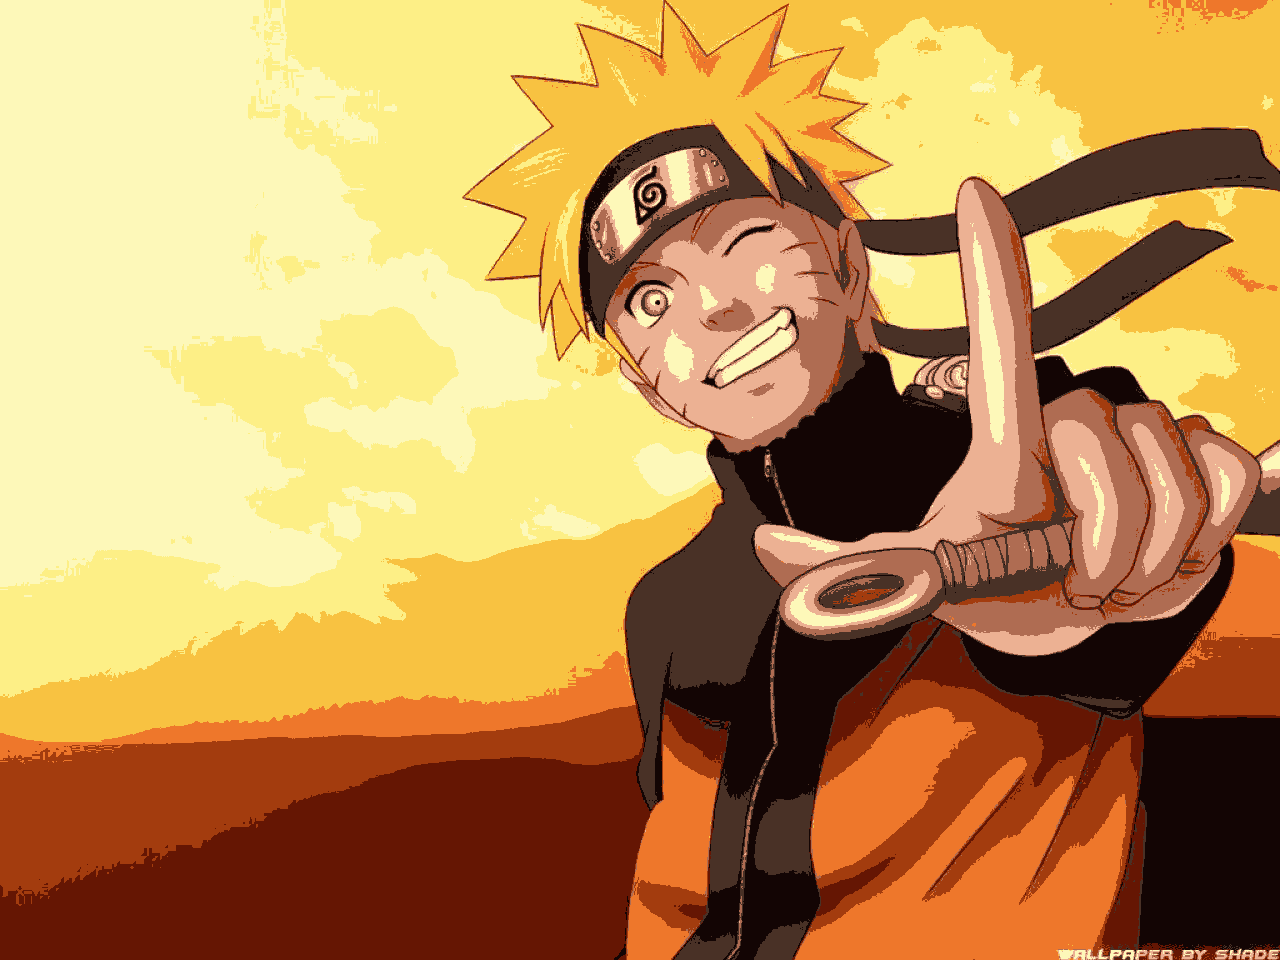

In [27]:
comp_img

In [28]:
comp_img.save('naruto1.png')

In [30]:
img_1 = mpimg.imread('naruto.png')
img_2 = mpimg.imread('naruto1.png')

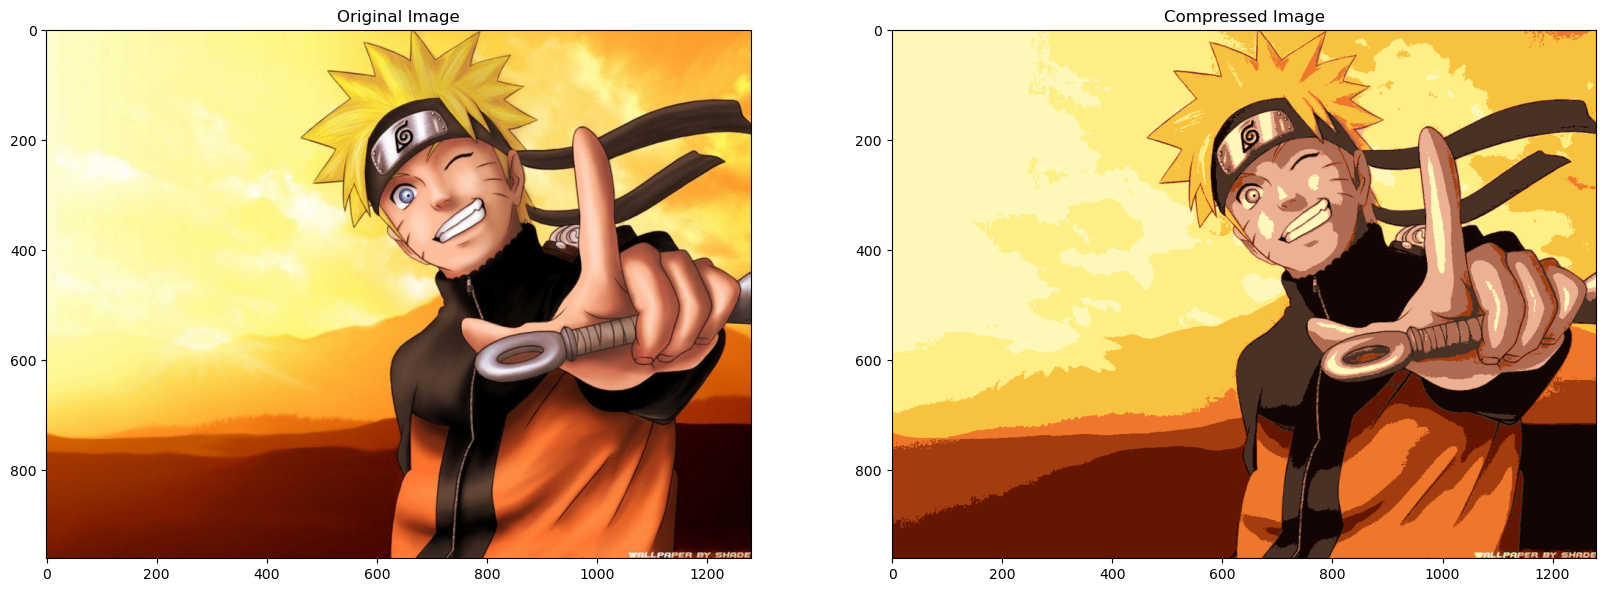

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (20,20))
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plt.show()

END